<a href="https://colab.research.google.com/github/aadhi0610/Breats-cancer-classification/blob/main/Ensemble(Ensemble)_(VGG16%2BResNet50)_x_(effecientnet%2BVGG19)_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading and preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install torchvision

In [ ]:
!pip install -U efficientnet

     |████████████████████████████████| 50 kB 2.9 MB/s 


In [ ]:
import efficientnet.keras as efn

In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Cancer_PNG.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from keras.models import Sequential,Model
from keras.applications.vgg16 import preprocess_input,VGG16
from keras.applications.vgg19 import VGG19
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten,Input,GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from keras.utils.vis_utils import plot_model
import ipywidgets as widgets
from sklearn.preprocessing import OneHotEncoder
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from glob import glob
from tifffile import imread, imwrite
from skimage.transform import resize

In [ ]:
len(os.listdir('/tmp/Cancer_PNG/'))

4

In [ ]:
# Prepere data
benign = os.listdir('/tmp/Cancer_PNG/Benign')
insitu  = os.listdir('/tmp/Cancer_PNG/InSitu')
invasive  = os.listdir('/tmp/Cancer_PNG/Invasive')
normal  = os.listdir('/tmp/Cancer_PNG/Normal')



In [ ]:
# Prepere input data
X_data =[]
for file in benign:
    img = cv2.imread('/tmp/Cancer_PNG/Benign/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

for file in insitu:
    img = cv2.imread('/tmp/Cancer_PNG/InSitu/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
  
for file in invasive:
    img = cv2.imread('/tmp/Cancer_PNG/Invasive/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

for file in normal:
    img = cv2.imread('/tmp/Cancer_PNG/Normal/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
image_width=224
image_height=224

In [ ]:
X = np.squeeze(X_data)
X.shape

(400, 224, 224, 3)

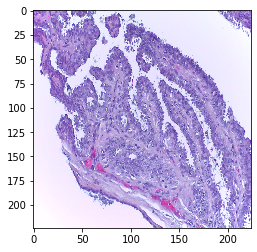

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X[5], interpolation='nearest')
plt.show()

In [ ]:
target_benign=np.full(len(benign),3)
target_insitu=np.full(len(insitu),2)
target_invasive=np.full(len(invasive),1)
target_normal=np.full(len(normal),0)
Y=np.concatenate([target_benign,target_insitu,target_invasive,target_normal])
Y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
len(Y)

400

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle='true')
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print('number_of_train:', number_of_train)
print('number_of_test:', number_of_test)

number_of_train: 320
number_of_test: 80


# Ensemble(Ensemble)

## VGG16

In [ ]:
early_stop=EarlyStopping(patience=4)
reduceLR=ReduceLROnPlateau(patience=4)

In [ ]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.112.205.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.112.205.42:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
  with tpu_strategy.scope():
      vgg_model = VGG16(weights='imagenet',include_top=False)
      for layers in vgg_model.layers:
          layers.trainable=False
      x=vgg_model.output
      x=GlobalAveragePooling2D()(x)
      x=Dense(128,activation='relu')(x)
      x=Dropout(0.15)(x)
      output=Dense(4,activation='softmax')(x)
      model2=Model(inputs=vgg_model.input,outputs=output)
      model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from random import shuffle

ind_list = [i for i in range(len(X_train))]
shuffle(ind_list)
X_train_new  = X_train[ind_list, :,:,:]
Y_train_new = Y_train[ind_list]

In [ ]:
# Checkpoint to save best model per epoch
model_filepath = "/content/drive/My Drive/vgg-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbackvgg = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r2=model2.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbackvgg])

Epoch 1/20
8/8 [==============================] - 11s 686ms/step - loss: 4.5177 - accuracy: 0.3438 - val_loss: 2.9183 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/My Drive/vgg-01-0.5000.hdf5
Epoch 2/20
8/8 [==============================] - 1s 131ms/step - loss: 1.6590 - accuracy: 0.5820 - val_loss: 1.7455 - val_accuracy: 0.6250

Epoch 00002: val_accuracy improved from 0.50000 to 0.62500, saving model to /content/drive/My Drive/vgg-02-0.6250.hdf5
Epoch 3/20
8/8 [==============================] - 1s 130ms/step - loss: 1.2424 - accuracy: 0.6641 - val_loss: 1.8283 - val_accuracy: 0.6250

Epoch 00003: val_accuracy did not improve from 0.62500
Epoch 4/20
8/8 [==============================] - 1s 125ms/step - loss: 0.8301 - accuracy: 0.7305 - val_loss: 1.2339 - val_accuracy: 0.7188

Epoch 00004: val_accuracy improved from 0.62500 to 0.71875, saving model to /content/drive/My Drive/vgg-04-0.7188.hdf5
Epoch 5/20
8/8 [==========

## ResNet50

In [ ]:
with tpu_strategy.scope():
  res=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)
  for layers in res.layers:
          layers.trainable=False
  x=res.output
  x=GlobalAveragePooling2D()(x)
  x=Dense(128,activation='relu')(x)
  x=Dropout(0.15)(x)
  output=Dense(4,activation='softmax')(x)
  model3=Model(inputs=res.input,outputs=output)
  model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
from random import shuffle

ind_list = [i for i in range(len(X_train))]
shuffle(ind_list)
X_train_new  = X_train[ind_list, :,:,:]
Y_train_new = Y_train[ind_list]

In [ ]:
model_filepath = "/content/drive/My Drive/res-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbackres = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r2=model3.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbackres])

Epoch 1/20
8/8 [==============================] - 58s 4s/step - loss: 1.6236 - accuracy: 0.3906 - val_loss: 0.9484 - val_accuracy: 0.5938

Epoch 00001: val_accuracy improved from -inf to 0.59375, saving model to /content/drive/My Drive/res-01-0.5938.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
8/8 [==============================] - 1s 123ms/step - loss: 0.8432 - accuracy: 0.6836 - val_loss: 0.7423 - val_accuracy: 0.6719

Epoch 00002: val_accuracy improved from 0.59375 to 0.67188, saving model to /content/drive/My Drive/res-02-0.6719.hdf5
Epoch 3/20
8/8 [==============================] - 1s 121ms/step - loss: 0.6755 - accuracy: 0.7617 - val_loss: 0.5621 - val_accuracy: 0.7500

Epoch 00003: val_accuracy improved from 0.67188 to 0.75000, saving model to /content/drive/My Drive/res-03-0.7500.hdf5
Epoch 4/20
8/8 [==============================] - 1s 147ms/step - loss: 0.5295 - accuracy: 0.8242 - val_loss: 0.6469 - val_accuracy: 0.7344

Epoch 00004: val_accuracy did not improve from 0.75000
Epoch 5/20
8/8 [==============================] - 1s 129ms/step - loss: 0.4677 - accuracy: 0.8281 - val_loss: 0.5372 - val_accuracy: 0.7969

Epoch 00005: val_accuracy improved from 0.75000 to 0.79688, saving model to /content/drive/My Drive/res-05-0.7969.hdf5
Epoch 6/20
8/8 [========

## Ensemble1

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model("/content/drive/My Drive/vgg-13-0.7344.hdf5")
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='vgg16')
model_2 = load_model("/content/drive/My Drive/res-20-0.8281.hdf5")
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='resnet50')
models = [model_1, model_2]
model_input = Input(shape=(image_width, image_height, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
 ensemble_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_filepath = "/content/drive/My Drive/e1-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbacke1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r4=ensemble_model.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbacke1])

Epoch 1/20
8/8 [==============================] - 10s 809ms/step - loss: 0.1419 - accuracy: 0.9688 - val_loss: 0.3925 - val_accuracy: 0.8906

Epoch 00001: val_accuracy improved from -inf to 0.89062, saving model to /content/drive/My Drive/e1-01-0.8906.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
8/8 [==============================] - 5s 628ms/step - loss: 0.1391 - accuracy: 0.9531 - val_loss: 0.3121 - val_accuracy: 0.8750

Epoch 00002: val_accuracy did not improve from 0.89062
Epoch 3/20
8/8 [==============================] - 5s 644ms/step - loss: 0.0968 - accuracy: 0.9844 - val_loss: 0.3516 - val_accuracy: 0.8750

Epoch 00003: val_accuracy did not improve from 0.89062
Epoch 4/20
8/8 [==============================] - 5s 627ms/step - loss: 0.0822 - accuracy: 0.9922 - val_loss: 0.3752 - val_accuracy: 0.8750

Epoch 00004: val_accuracy did not improve from 0.89062
Epoch 5/20
8/8 [==============================] - 5s 628ms/step - loss: 0.0657 - accuracy: 0.9961 - val_loss: 0.2986 - val_accuracy: 0.8594

Epoch 00005: val_accuracy did not improve from 0.89062
Epoch 6/20
8/8 [==============================] - 5s 630ms/step - loss: 0.0590 - accuracy: 0.9883 - val_loss: 0.2711 - val_accuracy: 0.8906

Epoch 00006: val_accuracy did not improve from 0.89062
Epoch 7/20
8/8 [====

## EffecientNet

In [ ]:
import keras.utils

In [ ]:
pip install segmentation-models

  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.1.1
    Uninstalling efficientnet-1.1.1:
      Successfully uninstalled efficientnet-1.1.1


In [ ]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
with tpu_strategy.scope():
  eff = EfficientNetB0(weights='imagenet')
  for layers in eff.layers:
          layers.trainable=False
  x=eff.output
  #x=GlobalMaxPooling2D()(x)
  x=Dense(128,activation='relu')(x)
  x=Dropout(0.15)(x)
  output=Dense(4,activation='softmax')(x)
  model5=Model(inputs=eff.input,outputs=output)
  model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 
  

In [ ]:
model_filepath = "/content/drive/My Drive/ef-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbackef = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:

r2=model5.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbackef])

Epoch 1/20
8/8 [==============================] - 31s 2s/step - loss: 1.3831 - accuracy: 0.3008 - val_loss: 1.3779 - val_accuracy: 0.4844

Epoch 00001: val_accuracy improved from -inf to 0.48438, saving model to /content/drive/My Drive/ef-01-0.4844.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
8/8 [==============================] - 1s 126ms/step - loss: 1.3733 - accuracy: 0.5000 - val_loss: 1.3717 - val_accuracy: 0.4688

Epoch 00002: val_accuracy did not improve from 0.48438
Epoch 3/20
8/8 [==============================] - 1s 132ms/step - loss: 1.3659 - accuracy: 0.5195 - val_loss: 1.3648 - val_accuracy: 0.4375

Epoch 00003: val_accuracy did not improve from 0.48438
Epoch 4/20
8/8 [==============================] - 1s 134ms/step - loss: 1.3544 - accuracy: 0.5391 - val_loss: 1.3568 - val_accuracy: 0.4375

Epoch 00004: val_accuracy did not improve from 0.48438
Epoch 5/20
8/8 [==============================] - 1s 122ms/step - loss: 1.3430 - accuracy: 0.5508 - val_loss: 1.3490 - val_accuracy: 0.4375

Epoch 00005: val_accuracy did not improve from 0.48438
Epoch 6/20
8/8 [==============================] - 1s 117ms/step - loss: 1.3304 - accuracy: 0.5352 - val_loss: 1.3394 - val_accuracy: 0.4219

Epoch 00006: val_accuracy did not improve from 0.48438
Epoch 7/20
8/8 [====

## VGG19


In [ ]:
with tpu_strategy.scope():
      vgg19_model = VGG19(weights='imagenet',include_top=False)
      for layers in vgg19_model.layers:
          layers.trainable=False
      x=vgg19_model.output
      x=GlobalAveragePooling2D()(x)
      x=Dense(128,activation='relu')(x)
      x=Dropout(0.15)(x)
      output=Dense(4,activation='softmax')(x)
      model2=Model(inputs=vgg19_model.input,outputs=output)
      model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from random import shuffle

ind_list = [i for i in range(len(X_train))]
shuffle(ind_list)
X_train_new  = X_train[ind_list, :,:,:]
Y_train_new = Y_train[ind_list]

In [ ]:
# Checkpoint to save best model per epoch
model_filepath = "/content/drive/My Drive/vgg19-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbackvgg19 = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r2=model2.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbackvgg19])

Epoch 1/20
8/8 [==============================] - 11s 657ms/step - loss: 2.9319 - accuracy: 0.4219 - val_loss: 1.9797 - val_accuracy: 0.5312

Epoch 00001: val_accuracy improved from -inf to 0.53125, saving model to /content/drive/My Drive/vgg19-01-0.5312.hdf5
Epoch 2/20
8/8 [==============================] - 1s 128ms/step - loss: 1.7353 - accuracy: 0.5547 - val_loss: 1.7547 - val_accuracy: 0.6406

Epoch 00002: val_accuracy improved from 0.53125 to 0.64062, saving model to /content/drive/My Drive/vgg19-02-0.6406.hdf5
Epoch 3/20
8/8 [==============================] - 1s 123ms/step - loss: 1.3401 - accuracy: 0.6250 - val_loss: 1.5786 - val_accuracy: 0.6250

Epoch 00003: val_accuracy did not improve from 0.64062
Epoch 4/20
8/8 [==============================] - 1s 123ms/step - loss: 0.9647 - accuracy: 0.7031 - val_loss: 1.3921 - val_accuracy: 0.7031

Epoch 00004: val_accuracy improved from 0.64062 to 0.70312, saving model to /content/drive/My Drive/vgg19-04-0.7031.hdf5
Epoch 5/20
8/8 [====

## Ensemble2


In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model("/content/drive/My Drive/e1-01-0.8906.hdf5")
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='e1')
model_2 = load_model("/content/drive/My Drive/vgg19-07-0.7188.hdf5")
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='vgg19')
models = [model_1, model_2]
model_input = Input(shape=(image_width, image_height, 3))
model_outputs = [model(model_input) for model in models]
ensemble2_output = Average()(model_outputs)
ensemble2_model = Model(inputs=model_input, outputs=ensemble2_output, name='ensemble')

In [ ]:
ensemble2_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_filepath = "/content/drive/My Drive/e2-{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callbacke2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    verbose=1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
r4=ensemble2_model.fit(X_train_new,Y_train_new,validation_split=0.2,epochs=20, callbacks=[model_checkpoint_callbacke2])

Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 0.0295 - accuracy: 0.9961 - val_loss: 0.5457 - val_accuracy: 0.7188

Epoch 00001: val_accuracy did not improve from 0.82812
Epoch 2/20
